In [5]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster

In [6]:
#Carga de base de datos 1
covid_data = pd.read_csv('D:/Usuario/Mis_Documentos/HDSP/Actividades/BasesDatos/COVID-19-worldwide-aggregate.csv', encoding = 'unicode_escape')
covid_data.head()

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,557,30,17,NaN
1,2020-01-23,655,32,18,17.594255
2,2020-01-24,941,39,26,43.664122
3,2020-01-25,1433,42,42,52.284803
4,2020-01-26,2118,56,56,47.801814


In [7]:
print('Tamaño del dataset:', covid_data.shape)

Tamaño del dataset: (419, 5)


In [8]:
print(*'Datos generales')
covid_data.describe()

D a t o s   g e n e r a l e s


,Confirmed,Recovered,Deaths,Increase rate
count,4.190000e+02,4.190000e+02,4.190000e+02,418.000000
mean,3.667730e+07,2.163084e+07,9.371965e+05,3.186418
std,3.831564e+07,2.195674e+07,7.966311e+05,7.363432
min,5.570000e+02,3.000000e+01,1.700000e+01,0.255363
25%,3.727004e+06,1.218592e+06,2.648590e+05,0.856701
50%,2.215711e+07,1.411719e+07,7.813920e+05,1.188595
75%,6.371648e+07,4.080796e+07,1.477808e+06,2.088313
max,1.202172e+08,6.818585e+07,2.660456e+06,90.570550


In [9]:
for column in covid_data.columns:
    print('Datos faltantes en {} : {}'.format(column, covid_data[column].isna().sum()))

Datos faltantes en Date : 0
Datos faltantes en Confirmed : 0
Datos faltantes en Recovered : 0
Datos faltantes en Deaths : 0
Datos faltantes en Increase rate : 1


In [10]:
# Se quita dato faltante
covid_data.dropna(subset = ["Increase rate"], inplace=True)

In [11]:
#Descripción estadística del dataset
for column in covid_data.columns:
    print('Datos faltantes en {} : {}'.format(column, covid_data[column].isna().sum()))
print('\nDatos preprocesados:')    
covid_data.describe()

Datos faltantes en Date : 0
Datos faltantes en Confirmed : 0
Datos faltantes en Recovered : 0
Datos faltantes en Deaths : 0
Datos faltantes en Increase rate : 0

Datos preprocesados:


,Confirmed,Recovered,Deaths,Increase rate
count,4.180000e+02,4.180000e+02,4.180000e+02,418.000000
mean,3.676505e+07,2.168259e+07,9.394386e+05,3.186418
std,3.831939e+07,2.195746e+07,7.962610e+05,7.363432
min,6.550000e+02,3.200000e+01,1.800000e+01,0.255363
25%,3.794194e+06,1.251533e+06,2.694368e+05,0.856701
50%,2.229690e+07,1.422619e+07,7.847360e+05,1.188595
75%,6.386964e+07,4.092701e+07,1.480980e+06,2.088313
max,1.202172e+08,6.818585e+07,2.660456e+06,90.570550


In [12]:
#Formato para pandas de date
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data.head()

,Date,Confirmed,Recovered,Deaths,Increase rate
1,2020-01-23,655,32,18,17.594255
2,2020-01-24,941,39,26,43.664122
3,2020-01-25,1433,42,42,52.284803
4,2020-01-26,2118,56,56,47.801814
5,2020-01-27,2927,65,82,38.196412


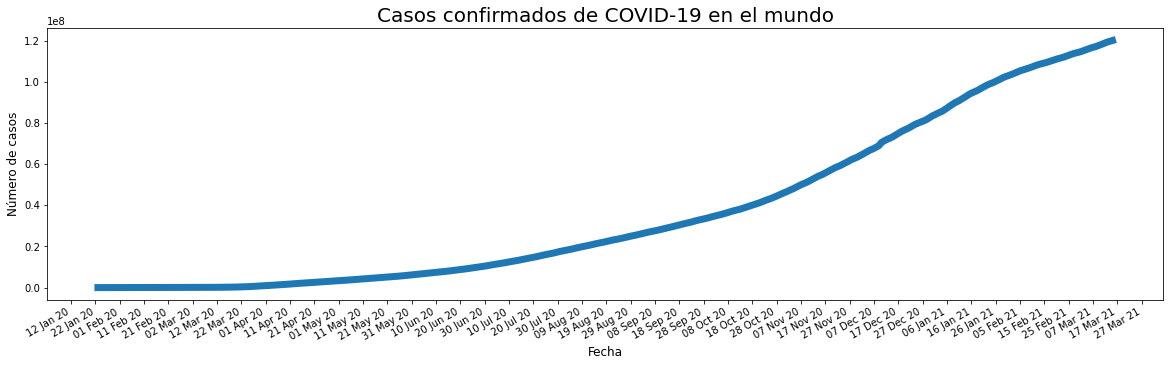

In [13]:
confirmados = covid_data['Confirmed']
date = covid_data['Date']

fig, ax = plt.subplots(figsize=(20,5))

plt.plot(date,confirmados, linewidth=7)
plt.title('Casos confirmados de COVID-19 en el mundo', fontsize=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de casos', fontsize=12)
#plt.legend(fontsize=12)

ax.get_xaxis().set_major_locator(mdates.DayLocator(interval=10))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%d %b %y'))
plt.setp(ax.get_xticklabels(), rotation = 30, ha='right')

plt.show()

Este grafico describe los casos confirmados de COVID-19 a nievl mundial con ventanas de tiempo de 10 días y los casos están en una escla 1e8. Se puede observar cierta tendencia exponencial conforme avanzan los días.



In [14]:
covid_data['Mortality'] = (covid_data['Deaths']*100)/covid_data['Confirmed']
covid_data.head()

,Date,Confirmed,Recovered,Deaths,Increase rate,Mortality
1,2020-01-23,655,32,18,17.594255,2.748092
2,2020-01-24,941,39,26,43.664122,2.763018
3,2020-01-25,1433,42,42,52.284803,2.930914
4,2020-01-26,2118,56,56,47.801814,2.644004
5,2020-01-27,2927,65,82,38.196412,2.801503


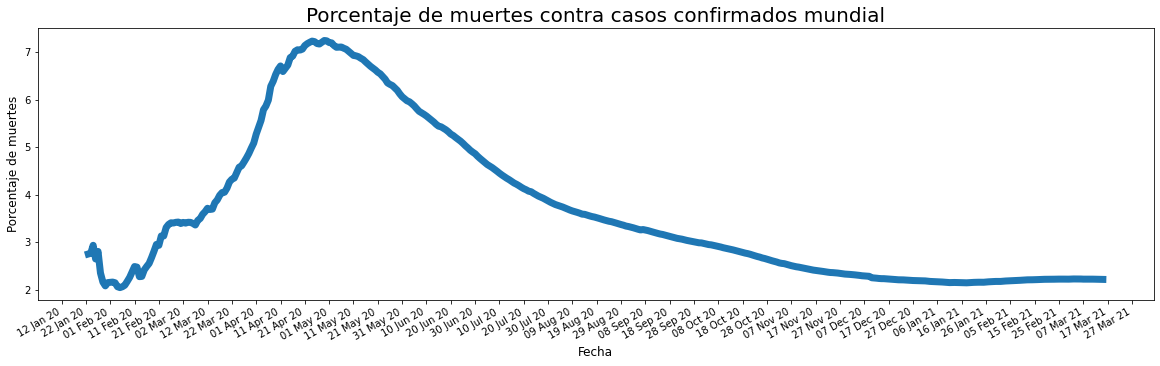

In [15]:
Mortality = covid_data['Mortality']
date = covid_data['Date']

fig, ax = plt.subplots(figsize=(20,5))

plt.plot(date,Mortality, linewidth=7)
plt.title('Porcentaje de muertes contra casos confirmados mundial', fontsize=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Porcentaje de muertes', fontsize=12)
#plt.legend(fontsize=12)

ax.get_xaxis().set_major_locator(mdates.DayLocator(interval=10))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%d %b %y'))
plt.setp(ax.get_xticklabels(), rotation = 30, ha='right')

plt.show()

Este grafico representa la letalidad del virus calculado a partir del porcentaje de muertes contra los casos confirmados en los días mostrados. Se puede observar que la mayor letalidad ocurrió entre marzo y agosto a pesar de tener un número menor de casos confirmados comparado con los últimos meses como se observa en el primer gráfico. Esto podría deberse a la "curva de aprendizaje" de como combatir y tratar el virus en los primeros meses de la pandemia.

In [16]:
# Base de datos 2
covid_data_2 = pd.read_csv('D:/Usuario/Mis_Documentos/HDSP/Actividades/BasesDatos/countries-aggregated.csv', encoding = 'unicode_escape')
covid_data_2.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [17]:
#Casos confirmados por pais el 30 de enero del 2021
covid_enero = (covid_data_2[covid_data_2.Date == '2021-01-30'])
print(covid_enero.shape)
print(covid_enero.head())

(192, 5)
            Date      Country  Confirmed  Recovered  Deaths
374   2021-01-30  Afghanistan      55008      47609    2400
793   2021-01-30      Albania      77251      46927    1369
1212  2021-01-30      Algeria     107122      73152    2888
1631  2021-01-30      Andorra       9885       9045     101
2050  2021-01-30       Angola      19782      18015     464


In [18]:
#Localizador de coordenadas a partir de Países

longitude = []
latitude = []

def findGeocode(city):  
    try: 
        geolocator = Nominatim(user_agent="Code_Activ_3.3") 
          
        return geolocator.geocode(city) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(city)     


In [19]:
Longitude = []
Latitude = []
for country in covid_enero["Country"]: 
      
    if findGeocode(country) != None: 
           
        loc = findGeocode(country) 
        Latitude.append(loc.latitude) 
        Longitude.append(loc.longitude) 

    else: 
        Latitude.append(np.nan) 
        Longitude.append(np.nan) 

In [20]:
# Se agregan las coordenadas al DF
covid_enero['Latitude'] =  Latitude
covid_enero['Longitude'] = Longitude

C:\Users\Ian\AppData\Local\Temp/ipykernel_6736/2166559482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_enero['Latitude'] =  Latitude
C:\Users\Ian\AppData\Local\Temp/ipykernel_6736/2166559482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_enero['Longitude'] = Longitude


In [21]:
#Mapa interactivo
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Casos confirmados de COVID-19 en el mundo')
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
for i in range(len(covid_enero)):
        lat = covid_enero.iloc[i]['Latitude']
        long = covid_enero.iloc[i]['Longitude']
        radius=10
        popup_text = """Country: {}<br>
                    COVID-19 cases: {}<br>
                    Date: {}<br>"""
        popup_text = popup_text.format(covid_enero.iloc[i]['Country'],
                                   covid_enero.iloc[i]['Confirmed'],
                                       covid_enero.iloc[i]['Date']
                                   )
        popup_text = folium.Popup(popup_text, max_width=300,min_width=50)
         
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
        
world_map.get_root().html.add_child(folium.Element(title_html))
world_map

Mapa interactivo, donde se puede visualizar País, Casos confirmados de COVID-19 y Fecha correspondiente al reporte. Es posible hazer zoom y navegar por el mapa, donde se muestran clusters de los paises conforme se aleja o acerca el zoom. La información se despliega por medio de un pop-up cuando se señala el circulo de cada país.